<a href="https://colab.research.google.com/github/deenaseban/machine-learning/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
data.shape

(569, 32)

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
# data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [ ]:
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

<ipython-input-84-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

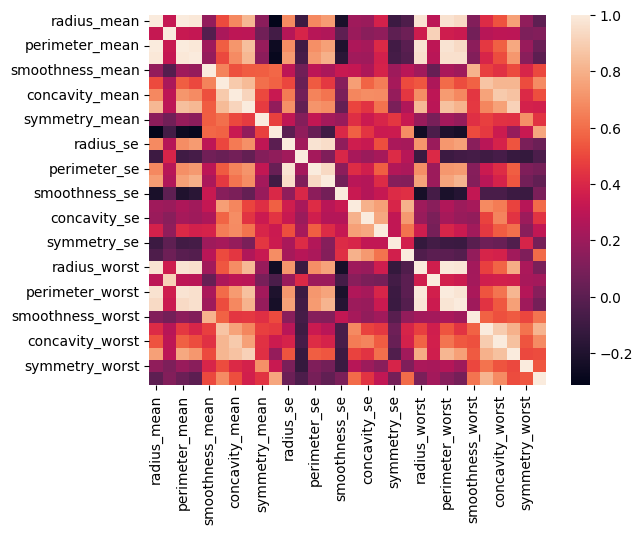

In [ ]:
sns.heatmap(data.corr())

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

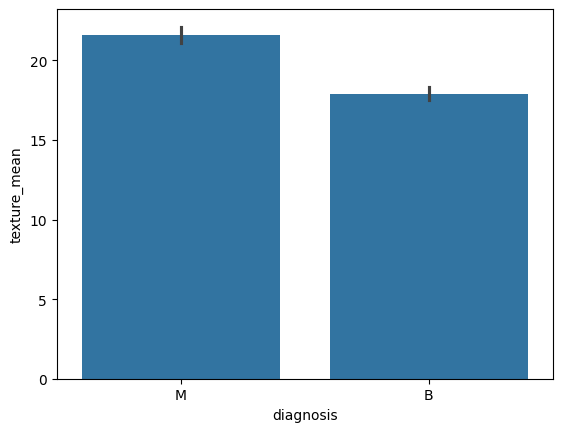

In [ ]:
sns.barplot(x='diagnosis',y='texture_mean',data=data)

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

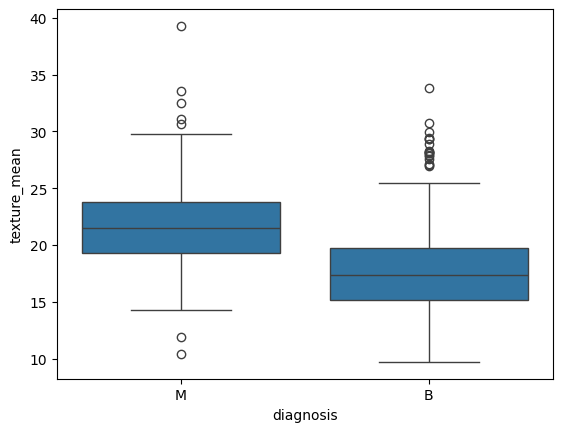

In [ ]:
sns.boxplot(x='diagnosis',y='texture_mean',data=data)

In [ ]:
# Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn_model=KNeighborsClassifier(n_neighbors=5,weights='uniform')
NB_model=GaussianNB()
SVM_model=SVC()
models=[knn_model,NB_model,SVM_model]

In [ ]:
for i in models:
  print('Model name:',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Confusion matrix:')
  print(confusion_matrix(y_test,y_pred))
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('Classification Report:')
  print(classification_report(y_test,y_pred))
  print('-'*100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [ ]:
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred2))
print('Accuracy Score:',accuracy_score(y_test,y_pred2))
print('Classification Report:')
print(classification_report(y_test,y_pred2))

Confusion matrix:
[[107   1]
 [  4  59]]
Accuracy Score: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred3=dt.predict(x_test)
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred3))
print('Accuracy Score:',accuracy_score(y_test,y_pred3))
print('Classification Report:')
print(classification_report(y_test,y_pred3))

Confusion matrix:
[[106   2]
 [  5  58]]
Accuracy Score: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



[Text(0.625, 0.9375, 'concave points_mean <= 0.075\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.3611111111111111, 0.8125, 'radius_worst <= 0.113\nentropy = 0.299\nsamples = 245\nvalue = [232, 13]'),
 Text(0.2222222222222222, 0.6875, 'area_se  <= 0.166\nentropy = 0.151\nsamples = 230\nvalue = [225, 5]'),
 Text(0.1111111111111111, 0.5625, 'texture_worst  <= 0.772\nentropy = 0.101\nsamples = 227\nvalue = [224, 3]'),
 Text(0.05555555555555555, 0.4375, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.16666666666666666, 0.4375, 'area_worst <= -0.421\nentropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.1111111111111111, 0.3125, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.2222222222222222, 0.3125, 'perimeter_mean <= -0.247\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.16666666666666666, 0.1875, 'symmetry_mean  <= -1.118\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1111111111111111, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue 

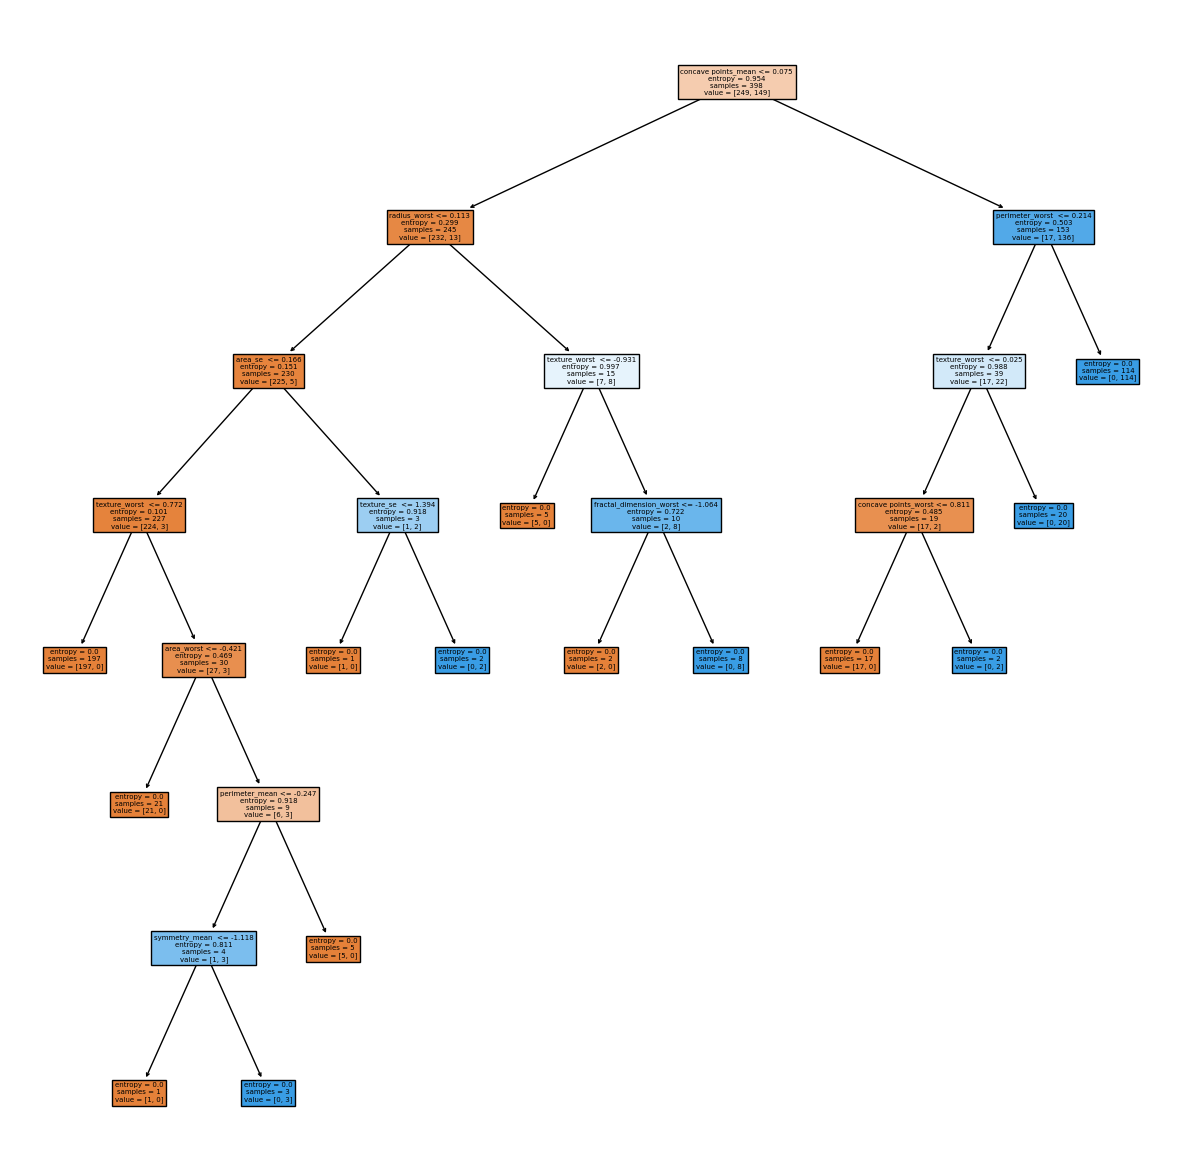

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt,feature_names=['radius_mean','texture_mean','perimeter_mean','area_mean ','smoothness_mean','compactness_mean','concavity_mean ','concave points_mean','symmetry_mean ', 'fractal_dimension_mean','radius_se ','texture_se ','perimeter_se','area_se ','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst ','perimeter_worst ','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'],filled=True)